The dataset utilized covers credit card transactions done by European cardholders in September 2013. This dataset contains 492 frauds out of 284,807 transactions over two days. The dataset is unbalanced, with the positive class (frauds) accounting for 0.172 percent of all transactions.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')

In [ ]:
dataset=pd.read_csv('/content/creditcard.csv')

In [ ]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


The Time is measured in seconds since the first transaction in the data collection. As a result, we may infer that this dataset contains all transactions recorded during two days. The features were prepared using PCA, so the physical interpretation of individual features does not make sense. 'Time' and 'Amount' are the only features that are not transformed to PCA. 'Class' is the response variable, and it has a value of 1 if there is fraud and 0 otherwise.

## Data Exploration and Visualization

 finding out the relative proportion of valid and fraudulent credit card transactions:

In [ ]:
print("Fraudlent Cases: "+str(len(dataset[dataset['Class']==1])))
print("Valid Transactions: " +str(len(dataset[dataset["Class"] == 0])))
print("Proportion of Fraudulent Cases: " + str(len(dataset[dataset["Class"] == 1])/ dataset.shape[0]))

Fraudlent Cases: 492
Valid Transactions: 284315
Proportion of Fraudulent Cases: 0.001727485630620034


<Axes: ylabel=' '>

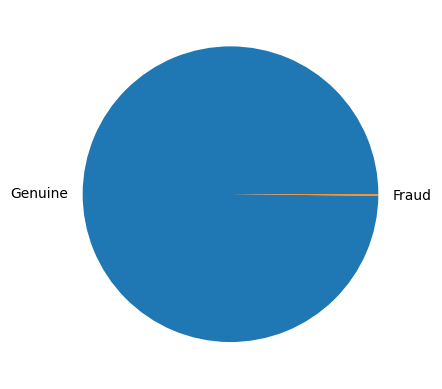

In [ ]:
data_p = dataset.copy()
data_p[" "] = np.where(data_p["Class"] == 1 ,  "Fraud", "Genuine")
data_p[" "].value_counts().plot(kind="pie")

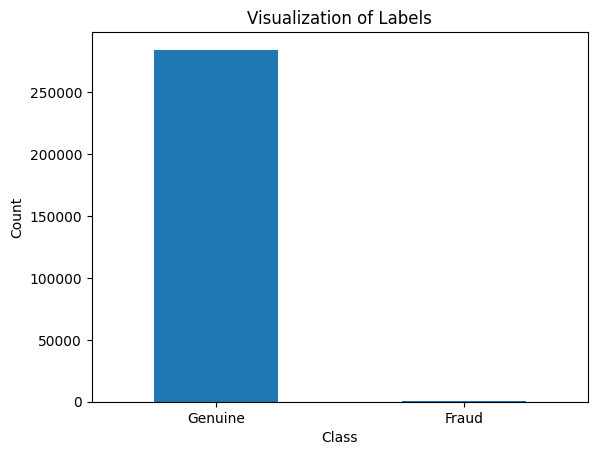

In [ ]:
labels = ["Genuine", "Fraud"]
count_classes = dataset.value_counts(dataset['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

There is an imbalance in the data, with only 0.17% of the total cases being fraudulent.

Now we look at the distribution of the two named features in the dataset. For Time, it is clear that there was a particular duration in the day when most of the transactions took place:

Text(0.5, 1.0, 'Distribution of Time')

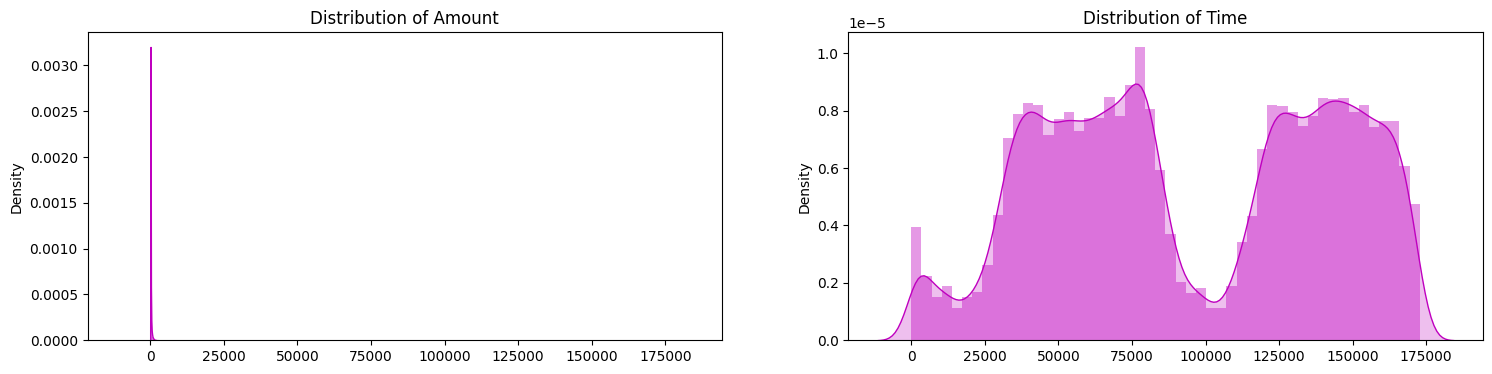

In [ ]:
f, axes=plt.subplots(1,2,figsize=(18,4),sharex=True)

amount_value=dataset['Amount'].values
time_value=dataset['Time'].values

sns.distplot(amount_value, hist=True, color='m', kde_kws={"shade":True}, ax=axes[0]).set_title('Distribution of Amount')
sns.distplot(time_value, hist=True, color='m', kde_kws={"shade":True}, ax=axes[1]).set_title('Distribution of Time')

checking if there is any difference between valid transactions and fraudulent transactions:

In [ ]:
print("Average Amount of Fraudlent Transactions: ", dataset[dataset["Class"]==1]["Amount"].mean())
print("Average Amount of Valid Transactions: ", dataset[dataset["Class"]==0]["Amount"].mean())

Average Amount of Fraudlent Transactions:  122.21132113821139
Average Amount of Valid Transactions:  88.29102242231328


As we notices above, that the average money transaction for the fraudulent transcations are more.

Now Let's see the distribution of values in each feature to understand the dataset more

Begining with Amount feature

In [ ]:
print("details regarding amount feature: ")
print("\n")
print(dataset['Amount'].describe())

details regarding amount feature: 


count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


Since, the most columns in our dataset doesn't provide any specific feature such as (v1 to v28), we will understanding them with some graphs.

Also, (v1 - v28) represents the credentials/data about cardholders and are in unvalued form let's classify them by Class feature as Valid Transactions or Fraud Transcations

In [ ]:
data_plot=dataset.copy()
amount=data_plot['Amount']
data_plot.drop(labels=['Amount'], axis=1, inplace=True)
data_plot.insert(0, 'Amount', amount)

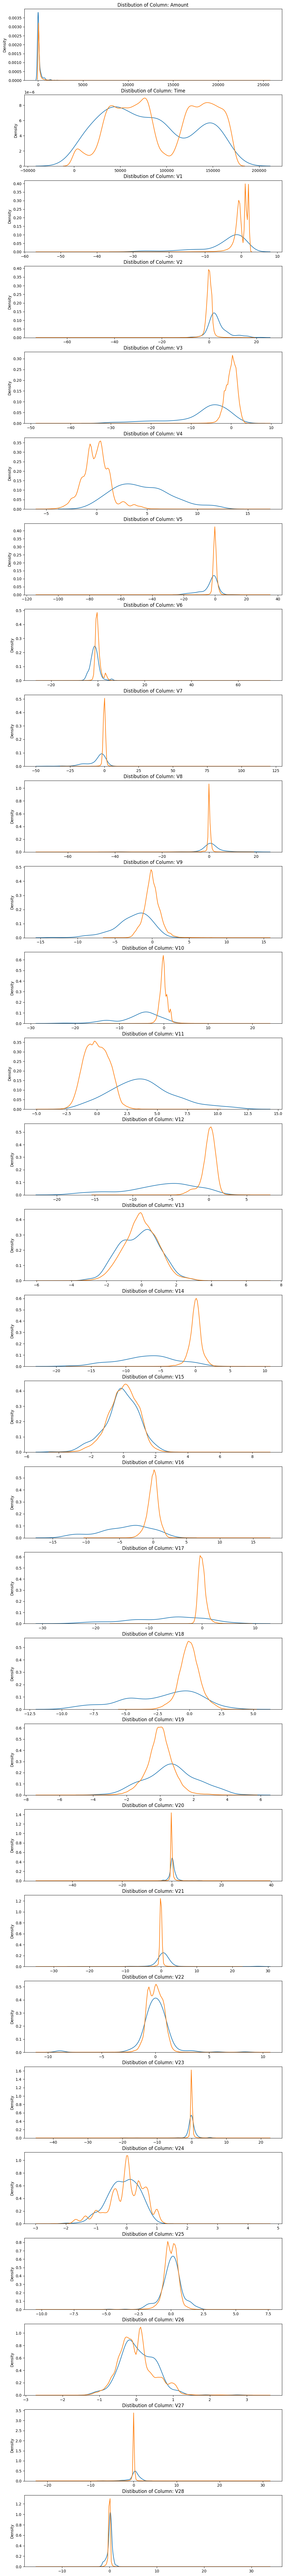

In [ ]:
columns=data_plot.iloc[:, 0:30].columns
plt.figure(figsize=(12, 30*4))
grids=gridspec.GridSpec(30,1)
for grid, index in enumerate(data_plot[columns]):
    graph=plt.subplot(grids[grid])
    sns.distplot(data_plot[index][data_plot.Class == 1], hist=False,  bins=50)
    sns.distplot(data_plot[index][data_plot.Class == 0], hist=False,  bins=50)
    graph.set_xlabel("")
    graph.set_title("Distibution of Column: "+str(index))
plt.show()

## Data Preparation

This features are created using PCA, feature selection is unnecessary as many features are tiny.
Now we will be searching for any missing values in the dataset:

In [ ]:
print("Non-missing values: ", dataset.isnull().shape[0])
print("Missing values: ", dataset.shape[0] - dataset.isnull().shape[0])

Non-missing values:  284807
Missing values:  0


As there are no missing data, we turn to standardization. We standardize only Time and Amount using RobustScaler:

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(dataset[["Time", "Amount"]])
dataset[["Time", "Amount"]] = scaler.transform(dataset[["Time", "Amount"]])

In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


In [ ]:
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0
284806,1.035022,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,2.724796,0


Now, we will be spliting credit card data with a split of 70-30 using train_test_split(), for the models we will be using.

In [ ]:
y = dataset["Class"]
X = dataset.iloc[:,:-1]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((227845, 30), (56962, 30), (227845,), (56962,))

## Training the Model on Dataset

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

#Below are the Models/Classifiers we will be using on dataset
from sklearn.linear_model import LogisticRegression

import pickle

Function for Confusion Matrix

In [ ]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

#### 1. Logistic Regression

In [ ]:
org_lr = LogisticRegression()
org_lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model_pkl_file = "org_lr.pkl"
with open(model_pkl_file, 'wb') as file:
    pickle.dump(org_lr, file)

In [ ]:
model_pkl_file = "org_lr.pkl"
with open(model_pkl_file, 'rb') as file:
    org_lr=pickle.load(file)

y_pred_org_lr = org_lr.predict(X_test)

org_lr_acc_score=accuracy_score(y_test, y_pred_org_lr)*100
org_lr_pre_score=precision_score(y_test, y_pred_org_lr)*100
org_lr_rec_score=recall_score(y_test, y_pred_org_lr)*100
org_lr_f1_score=f1_score(y_test, y_pred_org_lr)*100

print("The accuracy is", org_lr_acc_score)
print("The precision is", org_lr_pre_score)
print("The recall is", org_lr_rec_score)
print("The F1 score is", org_lr_f1_score)

The accuracy is 99.91222218320986
The precision is 86.36363636363636
The recall is 58.16326530612245
The F1 score is 69.51219512195121


Confusion Matrix 
[[56855     9]
 [   41    57]]




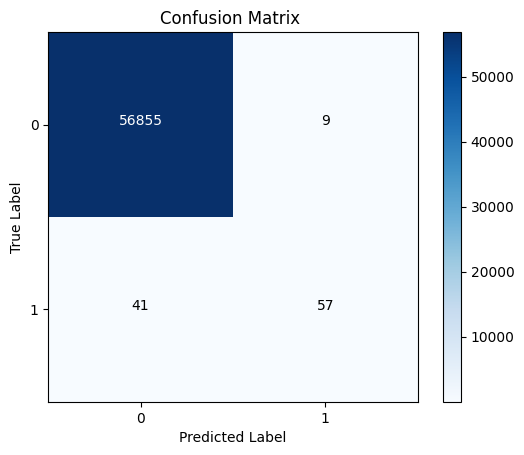

In [ ]:
org_lr_cm = confusion_matrix(y_test, y_pred_org_lr.round())
print("Confusion Matrix ")
print(org_lr_cm)
print("\n")
plot_confusion_matrix(org_lr_cm, classes=[0, 1], title= "Confusion Matrix ")

**UNDERSAMPLING**

In [ ]:
from imblearn.under_sampling import NearMiss

# undersampler = NearMiss()
# X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

X_resampled, y_resampled = NearMiss().fit_resample(X_train, y_train)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", y_resampled.shape)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

Resampled shape of X:  (788, 30)
Resampled shape of Y:  (788,)


The accuracy is 96.20253164556962
The precision is 97.53086419753086
The recall is 95.18072289156626
The F1 score is 96.34146341463415
Confusion Matrix - Decision Tree
[[73  2]
 [ 4 79]]




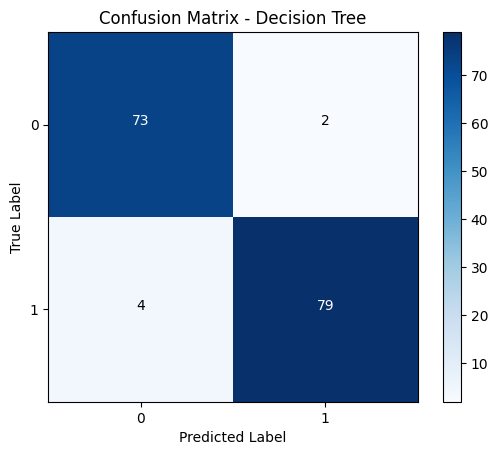

In [ ]:
un_lr=LogisticRegression()
un_lr.fit(X_resampled, y_resampled)
with open("un_lr.pkl", 'wb') as file:
    pickle.dump(un_lr, file)
with open("un_lr.pkl", 'rb') as file:
    un_lr=pickle.load(file)

y_pred_un_lr = un_lr.predict(X_test)

un_lr_acc_score=accuracy_score(y_test, y_pred_un_lr)*100
un_lr_pre_score=precision_score(y_test, y_pred_un_lr)*100
un_lr_rec_score=recall_score(y_test, y_pred_un_lr)*100
un_lr_f1_score=f1_score(y_test, y_pred_un_lr)*100

print("The accuracy is", un_lr_acc_score)
print("The precision is", un_lr_pre_score)
print("The recall is", un_lr_rec_score)
print("The F1 score is", un_lr_f1_score)
un_lr_cm = confusion_matrix(y_test, y_pred_un_lr.round())
print("Confusion Matrix - Decision Tree")
print(un_lr_cm)
print("\n")
plot_confusion_matrix(un_lr_cm, classes=[0, 1], title= "Confusion Matrix - Decision Tree")